In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("airindia_responses.csv")

In [5]:
df.head()

,Timestamp,Name,Gender,Age,Class,Were the arrival and departure timings punctual?,Were your flights cancelled?,"If cancelled, did you receive a refund within 7 business days ?",Were you happy with the Vistara- Air India merge?,How comfortable was your seat ?\n1-5 (low-high),How would you rate the cleanliness of your flight?,How would you rate the quality of your meals?,Were you satisfied with the in-flight entertainment system?,How good was your baggage handled ?,How well did the staff attend to your needs?,How was your overall experience with Air India?,"What 3 words best describe your experience with Air India?\n(Affordable, stressful, poor service, comfortable, frustrating)","What disappointed you the most during your flight?\n(Delays, cold food, hygiene, lost/damaged baggage, cramped seats, noisy)","What are your suggestions for improvement?\n(eg:- Improve food, clean better, reduce delays, polite staff, better pricing)\nFeel free to answer elaborately."
0,06-09-2025 17:23,Abrahaam Nithya Pandian,Male,25,Economy,No,No,NaN,No,4,3,3.0,3,2,3,4,"Economical , moderate service and good pilots",They left my baggage at Chennai airport itself...,"Reduce delays , handling baggages and also cle..."
1,06-08-2025 22:04,Akshaya,Female,18,Economy,Yes,No,NaN,Yes,3,3,3.0,3,3,3,3,"Affordable,good,easy",Nothing,Better pricing
2,06-08-2025 11:36,Amy,Female,24,First class,No,"Yes, No",No,No,1,2,2.0,1,2,1,1,"Stressful, bad, sad",Everything,Be more nice to rich people like me
3,06-08-2025 14:19,Anet Abey,Female,20,Economy,No,No,No,No,3,2,2.0,2,2,2,2,"Stressful, poor service, frustrating","Delays, cold food, damaged baggage, noisy","Improve food, clean better, reduce delays"
4,06-08-2025 12:13,Angel,Female,20,Economy,No,Yes,No,"Yes, No",3,3,3.0,3,3,3,3,Just okay,Cramped seats,Avoid cancellations


In [6]:
df.tail()

,Timestamp,Name,Gender,Age,Class,Were the arrival and departure timings punctual?,Were your flights cancelled?,"If cancelled, did you receive a refund within 7 business days ?",Were you happy with the Vistara- Air India merge?,How comfortable was your seat ?\n1-5 (low-high),How would you rate the cleanliness of your flight?,How would you rate the quality of your meals?,Were you satisfied with the in-flight entertainment system?,How good was your baggage handled ?,How well did the staff attend to your needs?,How was your overall experience with Air India?,"What 3 words best describe your experience with Air India?\n(Affordable, stressful, poor service, comfortable, frustrating)","What disappointed you the most during your flight?\n(Delays, cold food, hygiene, lost/damaged baggage, cramped seats, noisy)","What are your suggestions for improvement?\n(eg:- Improve food, clean better, reduce delays, polite staff, better pricing)\nFeel free to answer elaborately."
97,06-09-2025 19:25,Amil,Male,20,Economy,No,Yes,Yes,No,2,2,2.0,3,1,2,5,Frustrating\n,Delays,Good food
98,06-09-2025 19:38,Shwetha Gopinath,Female,19,Economy,Yes,No,NaN,No,1,2,2.0,4,2,5,3,"Affordable, issues with bagge, lack of cleanli...",Hygiene,Clean better
99,06-09-2025 20:30,Emiliya Tresa Mariya,Female,22,Economy,No,Yes,Yes,No,3,2,2.0,2,2,3,2,Stressful,Delays and hygiene,It will be really good to improve the food qua...
100,06-09-2025 21:22,THE ROY,Male,20,Economy,Yes,Yes,Yes,Yes,1,2,1.0,2,1,1,2,cycle is better 👍📈,wifi 😔,internet connection 😘
101,06-09-2025 21:42,Isaac,Male,21,Economy,No,Yes,No,No,3,3,2.0,2,3,3,3,"Affordable, Frustrating, Stressful",Cramped seats,Reduce delays


#### Data Cleaning

In [7]:
# Renaming the columns

df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Class': 'travel_class',
    'Were the arrival and departure timings punctual?': 'on_time',
    'Were your flights cancelled?': 'cancelled',
    'If cancelled, did you receive a refund within 7 business days ?': 'refund_on_time',
    'Were you happy with the Vistara- Air India merge?': 'merge_happy',
    'How comfortable was your seat ?\n1-5 (low-high)': 'seat_comfort',
    'How would you rate the cleanliness of your flight?': 'cleanliness',
    'How would you rate the quality of your meals?': 'meal_quality',
    'Were you satisfied with the in-flight entertainment system?': 'entertainment',
    'How good was your baggage handled ?': 'baggage_handling',
    'How well did the staff attend to your needs?': 'staff_service',
    'How was your overall experience with Air India?': 'overall_experience',
    'What 3 words best describe your experience with Air India?\n(Affordable, stressful, poor service, comfortable, frustrating)': 'describe_airindia',
    'What disappointed you the most during your flight?\n(Delays, cold food, hygiene, lost/damaged baggage, cramped seats, noisy)': 'disappointed_most',
    'What are your suggestions for improvement?\n(eg:- Improve food, clean better, reduce delays, polite staff, better pricing)\nFeel free to answer elaborately.': 'suggestions'
}, inplace=True)

In [8]:
# dropping timestamp and name columns as they are not useful

df.drop(columns=['Timestamp', 'Name'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              102 non-null    object 
 1   age                 102 non-null    int64  
 2   travel_class        102 non-null    object 
 3   on_time             102 non-null    object 
 4   cancelled           102 non-null    object 
 5   refund_on_time      73 non-null     object 
 6   merge_happy         102 non-null    object 
 7   seat_comfort        102 non-null    int64  
 8   cleanliness         102 non-null    int64  
 9   meal_quality        101 non-null    float64
 10  entertainment       102 non-null    int64  
 11  baggage_handling    102 non-null    int64  
 12  staff_service       102 non-null    int64  
 13  overall_experience  102 non-null    int64  
 14  describe_airindia   101 non-null    object 
 15  disappointed_most   102 non-null    object 
 16  suggesti

#### Handling Null values

In [10]:
df.isnull().sum()

gender                 0
age                    0
travel_class           0
on_time                0
cancelled              0
refund_on_time        29
merge_happy            0
seat_comfort           0
cleanliness            0
meal_quality           1
entertainment          0
baggage_handling       0
staff_service          0
overall_experience     0
describe_airindia      1
disappointed_most      0
suggestions            0
dtype: int64

In [11]:
# Handling the null values

df['refund_on_time'].fillna('Not Applicable',inplace=True)

# filling the null values with Not Applicable

In [12]:
df['meal_quality'].fillna(df['meal_quality'].median(),inplace=True)

# filling the null value with median

In [13]:
# since this is an open-ended text response, we can drop that row

df = df.dropna(subset=['describe_airindia'])

In [14]:
# null values handled

df.isnull().sum()

gender                0
age                   0
travel_class          0
on_time               0
cancelled             0
refund_on_time        0
merge_happy           0
seat_comfort          0
cleanliness           0
meal_quality          0
entertainment         0
baggage_handling      0
staff_service         0
overall_experience    0
describe_airindia     0
disappointed_most     0
suggestions           0
dtype: int64

In [15]:
df.columns

Index(['gender', 'age', 'travel_class', 'on_time', 'cancelled',
       'refund_on_time', 'merge_happy', 'seat_comfort', 'cleanliness',
       'meal_quality', 'entertainment', 'baggage_handling', 'staff_service',
       'overall_experience', 'describe_airindia', 'disappointed_most',
       'suggestions'],
      dtype='object')

#### Clustering Analysis (K-Means)

#### Objective 
##### To segment passenger textual feedback into distinct themes (clusters), helping Air India understand the most common types of concerns or sentiments without reading each review manually.

In [ ]:
# Performing K-Means clustering specifically on the text-based columns using TF-IDF.

In [25]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/299.9 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/299.9 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 196.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 297.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 305.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 305.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 305.0 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 218.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 218.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/299.9 kB 2

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud

In [17]:
# keeping the text based columns

df_text = df[['describe_airindia', 'disappointed_most', 'suggestions']].dropna()

In [ ]:
# dropna() removes rows with any missing value in the selected columns.
# K-Means can't handle missing data. We're focusing on just the open-ended responses.


In [18]:
# To simplify clustering, combine all three columns into a single string per row

df_text['combined_text'] = df_text['describe_airindia'] + ' ' + df_text['disappointed_most'] + ' ' + df_text['suggestions']

In [ ]:
# Merges the three text columns into one for analysis.
# It’s easier and more meaningful to cluster based on full context rather than splitting feedback across columns.


In [19]:
#  Applying TF-IDF Vectorization
# Converting text to numerical format using TF-IDF

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df_text['combined_text'])

In [ ]:
# Tfidf Vectorizer converts text into numbers based on how important a word is in that response (and not common overall).
# stop_words='english' removes unhelpful words like "is", "the", "and".
# ML algorithms can't understand raw text. TF-IDF gives us a way to represent text numerically.


In [ ]:
# TF: Term Frequency — how often a word appears in a document.
# IDF: Inverse Document Frequency — how unique or rare a word is across all documents.

# Tfidf Vectorizer turns each passenger's combined text into a row of numbers — each number representing a word's importance.
# machine learning models (like KMeans) can’t work directly with text. They only work with numbers.
# TF-IDF gives us a numerical representation of text while keeping meaning and importance of words.

In [20]:
# Geting feature names and mean scores for word cloud

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.mean(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))

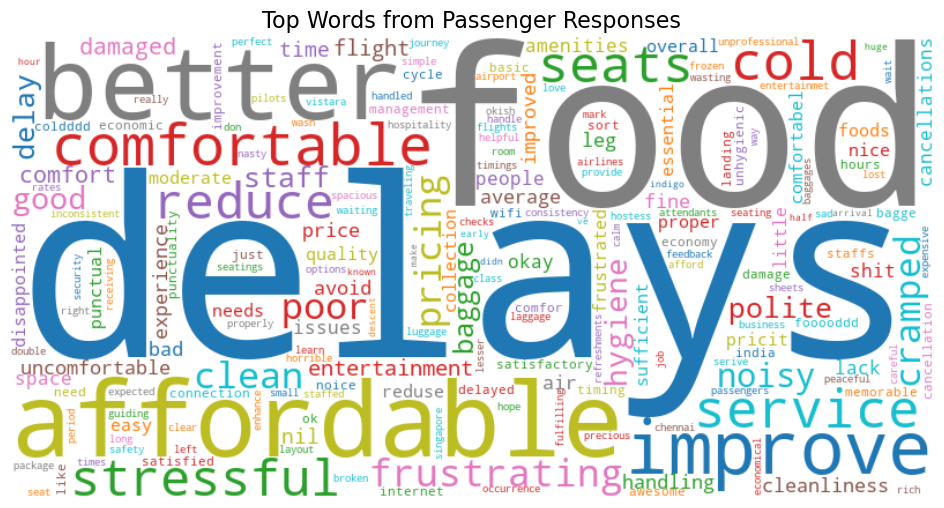

In [21]:
# generating word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='tab10').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words from Passenger Responses", fontsize=16)
plt.show()

In [ ]:
# Interpretation

# This is a word cloud
# This word cloud displays the most common and important words that appear in the text responses of Air India passengers

# The size of each word represents its importance and frequency, based on TF-IDF scores
# bigger size of the word represents higher frequency

In [ ]:
# This word cloud gives quick visual insights into:
# Passenger pain points (delays, seats, food).
# Areas of improvement (comfort, cleanliness, baggage).
# Common keywords that could help cluster feedback or train sentiment models.

In [ ]:
# Outcome

# Words like:
# "delays", "affordable", "food", "service", "seats", "cold", "cramped", "noisy", "damaged", "baggage"

# These indicate that passengers frequently mention:
# Flight delays and poor punctuality.
# Concerns about pricing (wanting it to be more affordable).
# Food quality 
# Seat comfort, noise levels, and cramped spaces.
# Baggage damage and handling issues.

In [ ]:
# Passengers are actively suggesting improvements, especially in areas like:
# Cleanliness
# Comfort
# Wi-Fi availability
# Reducing delays and noise

# Words like:
# "frustrated", "stressful", "disappointed", "awesome", "nice", "polite"
# This shows that while many passengers express negative emotions, a few are also leaving positive feedback

##### Applying Elbow method

In [22]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

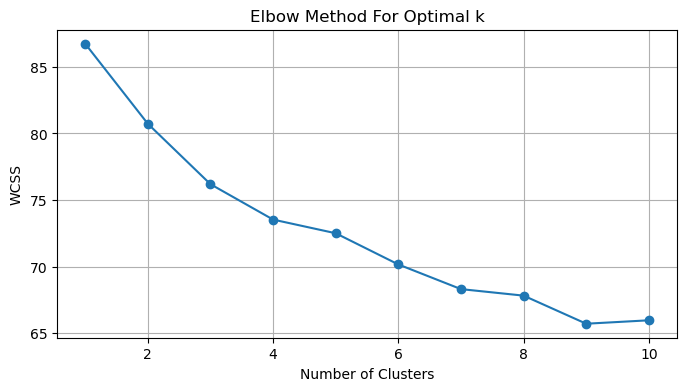

In [23]:
# Plotting the elbow graph

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# The “elbow point” on the graph is the value of k where the rate of improvement drops — indicating the ideal number of clusters.
# X-axis: Number of clusters (k)
# Y-axis: WCSS (Within-Cluster Sum of Squares) — lower is better, but with diminishing returns
# The goal is to find the "elbow point", where adding more clusters doesn’t significantly reduce WCSS.


In [ ]:
# Interpretation

# Using the Elbow Method, we have identified 3 as the optimal number of clusters.
# Beyond 3 clusters, the reduction in WCSS becomes marginal, indicating limited benefit from increasing cluster count.


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_text['cluster'] = kmeans.fit_predict(tfidf_matrix)

for i in range(3):
    print(f"\nCluster {i} Samples:")
    print(df_text[df_text['cluster'] == i]['combined_text'].head(3).to_string(index=False))


Cluster 0 Samples:
Economical , moderate service and good pilots  ...
       Affordable,good,easy Nothing Better pricing
Stressful, bad, sad Everything Be more nice to ...

Cluster 1 Samples:
Stressful, poor service, frustrating  Delays, c...
                    Affordable Delays Polite staff
Affordable comfortable frustrating Delays Reduc...

Cluster 2 Samples:
                          Poor service Cold food .
                Affordable Cold food Improved food
Affordable, comfortable, Good Cold food Improve...


In [ ]:
# Interpretation

# Cluster 0 Samples:
# Mixed sentiments, but mentions like economical, affordable, good pilots show some positivity. 
# Still, words like stressful, bad, sad suggest some negatives too.

# Group name could be:
# "Mixed Feedback: Budget-Oriented Flyers"
# People mentioning low cost and mixed experiences, neither fully satisfied nor angry.


# Cluster 1 Samples:
# Keywords like stressful, poor service, frustrating, delays dominate. Clear frustration, especially around delays and service.

# Group Name:
# "Negative Reviews: Delay & Service Issues"
# Frustrated customers complaining mostly about delays and service problems.


# Cluster 2 Samples:
# Keywords like cold food, poor service, improve food dominate. Not very emotional, but mostly focused on food quality.

# Group Name:
# "Food Complaints: Cold or Low-Quality Meals"
# Cluster focuses mainly on dissatisfaction with food, especially cold food.



In [29]:
from sklearn.decomposition import PCA

In [38]:
cluster_names = {
    0: 'Mixed Feedback: Budget-Oriented Flyers',
    1: 'Negative Reviews: Delay & Service Issues',
    2: 'Food Complaints: Cold or Low-Quality Meals'}

df_text['cluster_name'] = df_text['cluster'].map(cluster_names)

In [39]:
# Reduce TF-IDF vectors to 2D using PCA for visualization

pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

In [ ]:
# We used TF-IDF to convert text into numbers. The tfidf_matrix typically has:
# Thousands of columns (one for each unique word).
# Very sparse data — mostly zeros.
# So even though we are not seeing all those features explicitly, our text data is very high-dimensional under the hood. 
# that is why we have used PCA

# PCA is a dimensionality reduction technique. It’s commonly used when:
# data has many features (e.g., hundreds or thousands of columns).
# want to visualize high-dimensional data in 2D or 3D.


In [40]:
# Add PCA results to the df_text DataFrame

df_text['pca1'] = reduced_features[:, 0]
df_text['pca2'] = reduced_features[:, 1]

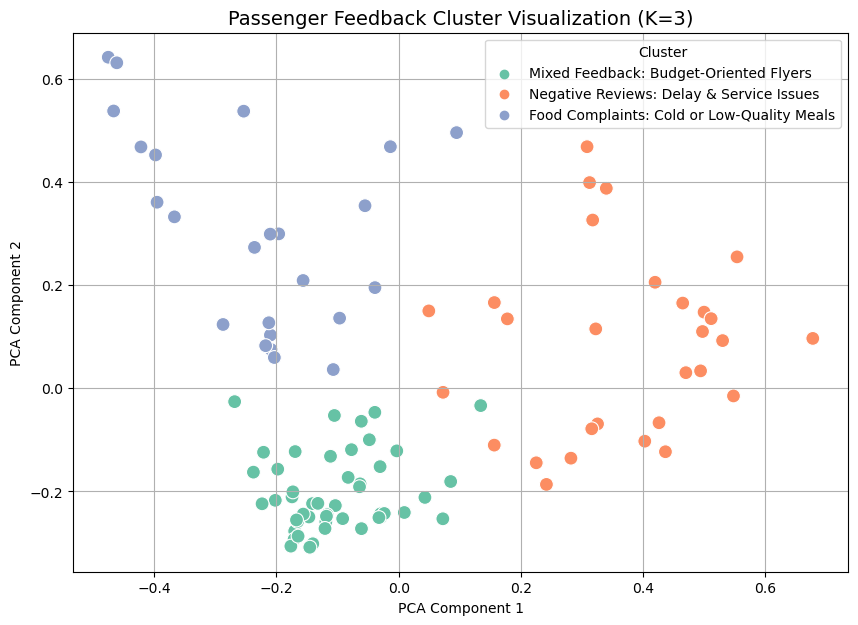

In [42]:
# Plotting clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_text, x='pca1', y='pca2', hue='cluster_name', palette='Set2', s=100)
plt.title('Passenger Feedback Cluster Visualization (K=3)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Interpretation

# The scatterplot shows clusters of passenger feedback,
# where each dot represents a text review compressed into two dimensions using PCA (Principal Component Analysis) for visualization.

# Green -	 Mixed Feedback: Budget-Oriented Flyers	-   Passengers giving balanced feedback; care about value for money

# Orange -   Negative Reviews: Delay & Service Issues -	 Complaints about flight delays, rude staff, slow check-in, etc.

# Blue	-   Food Complaints: Cold or Low-Quality Meals -  Focused mainly on bad food, meals served cold, no options, etc.

# The clusters are well-separated, meaning our model did a good job of grouping similar reviews together.

In [ ]:
# Outcome of the Model

# The dataset was transformed using TF-IDF vectorization to convert text to numerical features.
# Then KMeans clustering (k=3) grouped similar reviews.
# PCA was used only for 2D visualization.
# Each cluster had a unique dominant theme, suggesting clear segmentation of feedback.
# 3 clusters:
# 0) Mixed/Budget-focused
# 1) Service complaints
# 2) Food complaints

# Each review was assigned a cluster, making future classification or tagging easier.

#### Recommendations for Air India

In [ ]:
# Enhance in-flight meal quality with regional meal options and freshness assurance.

# Invest in staff training and onboard hospitality to address service complaints.

# Improve delay communication with real-time SMS/app updates.

# Targeted customer communication: Use feedback clusters to tailor loyalty campaigns (e.g., food-sensitive flyers vs. budget travelers).

# Predictive alert systems: Based on time series forecasts, prepare for economic dips or sudden drops in performance.
